In [1]:
import warnings
warnings.filterwarnings(action="ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Importing and Visualizing the data

In [2]:
from tensorflow.keras.datasets import mnist

2023-12-04 10:09:35.695737: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
rand_idx = np.random.randint(0, len(x_train))
print(x_train[rand_idx])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  21 173 253 255 253 254 172 132  51   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 123 223 253 252 253 252 253 252 253 252 163   

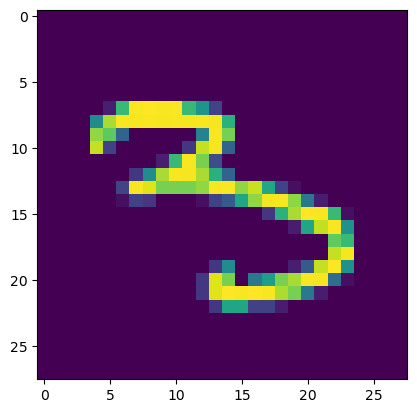

In [6]:
_ = plt.imshow(x_train[rand_idx])

In [7]:
print(y_train[rand_idx])

3


# Data Preprocessing

In [8]:
print(x_train.min(), x_train.max())

0 255


In [9]:
# Normalize the data

x_train = x_train / 255
x_test = x_test / 255

print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


In [10]:
print(x_train[rand_idx].shape)

(28, 28)


In [11]:
# Add a dimension for the single colour channel

x_train = x_train.reshape(60_000, 28, 28, 1)
x_test = x_test.reshape(10_000, 28, 28, 1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
single_image = x_train[rand_idx]

print(single_image.shape)

(28, 28, 1)


In [14]:
single_image_label = y_train[rand_idx]

print(single_image_label)

3


In [15]:
single_image_cat_label = to_categorical(y_train[rand_idx], num_classes=10)

print(single_image_cat_label)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [16]:
print(single_image_cat_label.shape)

(10,)


In [17]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

print(y_cat_train.shape)
print(y_cat_test.shape)

(60000, 10)
(10000, 10)


# Build a Simple Artificial Neural Network

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [19]:
model = Sequential()

model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(units=128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

In [23]:
model.fit(
    x_train,
    y_cat_train,
    validation_data=(x_test, y_cat_test),
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2602 - accuracy: 0.9255 - val_loss: 0.1372 - val_accuracy: 0.9616
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1115 - accuracy: 0.9672 - val_loss: 0.1012 - val_accuracy: 0.9692
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0786 - accuracy: 0.9768 - val_loss: 0.0921 - val_accuracy: 0.9715
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0587 - accuracy: 0.9824 - val_loss: 0.0707 - val_accuracy: 0.9778
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0452 - accuracy: 0.9860 - val_loss: 0.0700 - val_accuracy: 0.9786
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0362 - accuracy: 0.9884 - val_loss: 0.0725 - val_accuracy: 0.9788
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0761 - val_ac

# Evaluate the ANN Model

In [24]:
metrics = pd.DataFrame(model.history.history)
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

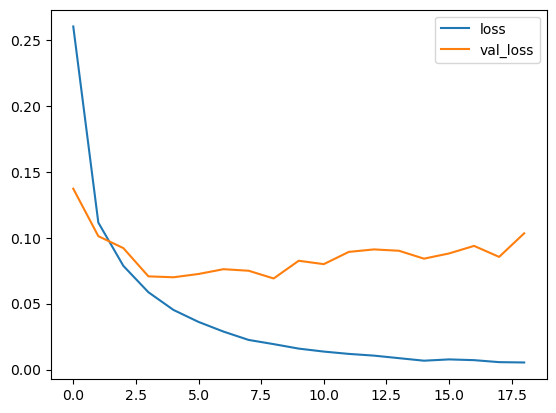

In [25]:
metrics[["loss", "val_loss"]].plot()

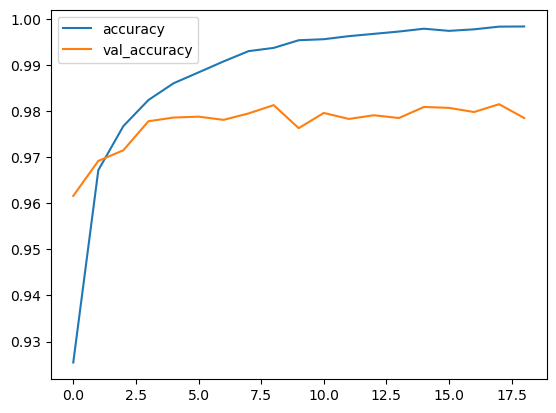

In [26]:
metrics[["accuracy", "val_accuracy"]].plot()

In [27]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.10334783047437668, 0.9785000085830688]

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
y_pred = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 0s 1ms/step


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [31]:
print(confusion_matrix(y_test, y_pred))

[[ 969    0    0    0    0    2    2    1    3    3]
 [   0 1126    3    1    0    0    2    0    3    0]
 [   2    1 1011    4    1    0    2    2    8    1]
 [   0    0    2  988    1    6    0    3    5    5]
 [   1    0    0    1  966    0    5    2    3    4]
 [   3    0    0    8    2  868    2    0    6    3]
 [   4    1    1    1    4    9  934    1    3    0]
 [   0    4   19    2    2    1    0  985    8    7]
 [   3    0    1    3    2    3    1    1  956    4]
 [   0    2    1    3    8    3    1    4    5  982]]


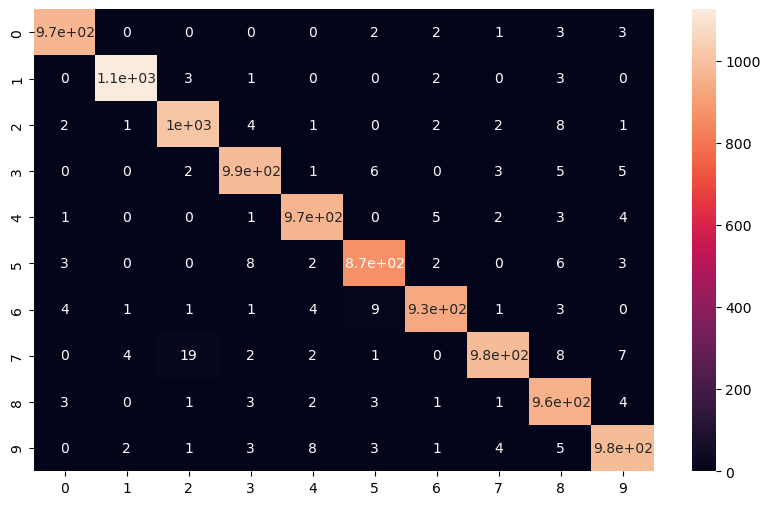

In [32]:
plt.figure(figsize=(10,6))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)